In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import os


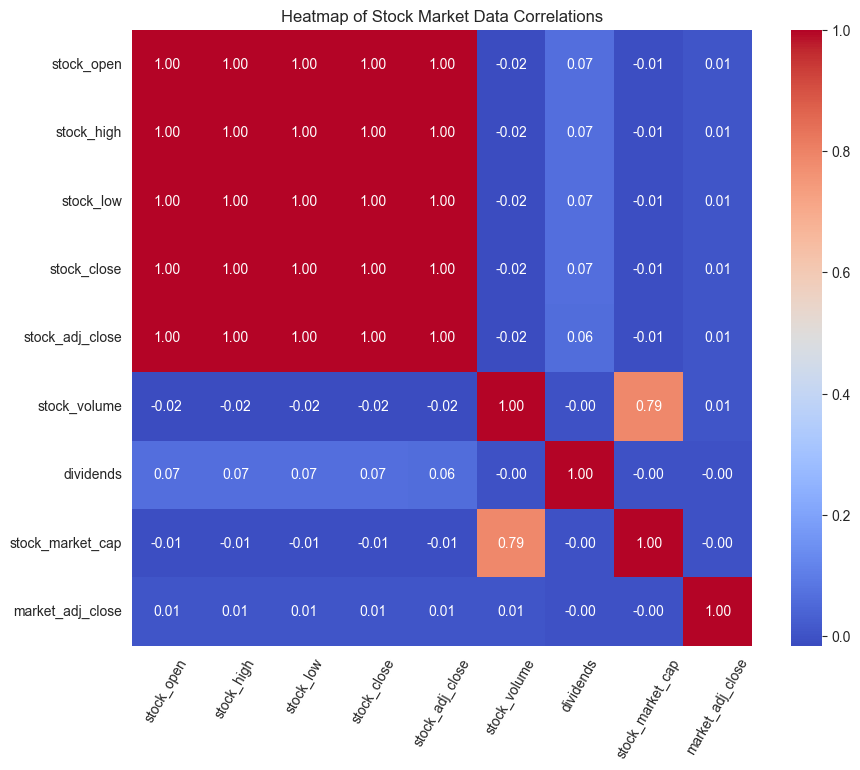

In [23]:

path = 'C:/Users/Janet/OneDrive - The University of Chicago/Data_policy/final-project-janet'
file_name = 'combined_stock_data.csv'
file_path = os.path.join(path, file_name)
df = pd.read_csv(file_path)


heatmap_data = df[['stock_open', 'stock_high', 'stock_low', 'stock_close', 
                   'stock_adj_close', 'stock_volume', 'dividends', 'stock_market_cap', 'market_adj_close']]


corr = heatmap_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Stock Market Data Correlations')
plt.xticks(rotation=60)
plt.show()

#Liquidity and Market Participation: Larger companies with higher market caps often have a greater number 
# of shares available for trading, which can lead to higher trading volumes due to increased liquidity. 
# More market participants (like institutional investors) are likely to trade these stocks, as they are 
# generally perceived as less risky compared to smaller-cap companies.

#Information Availability: Companies with large market capitalizations often have more visibility and 
# analyst coverage. This increased attention can lead to higher trading volumes as investors react to news,
# earnings reports, and other information.

In [28]:
import altair as alt
import pandas as pd

# Assuming your dataset is loaded into a DataFrame named 'data'
# First, we'll aggregate the data as done previously
exchange_industry_count = df.groupby(['exchange', 'industry']).size().unstack(fill_value=0)
exchange_industry_percentage = exchange_industry_count.div(exchange_industry_count.sum(axis=1), axis=0) * 100

# Flattening the DataFrame for use with Altair
flattened_data = exchange_industry_percentage.reset_index().melt(id_vars='exchange', var_name='industry', value_name='percentage')

# Creating the Altair chart with a diverging color scheme
chart = alt.Chart(flattened_data).mark_bar().encode(
    x=alt.X('sum(percentage):Q', title='Total Percentage'),
    y=alt.Y('exchange:N', title='Exchange'),
    color=alt.Color('industry:N', sort='descending', scale=alt.Scale(scheme='redblue'), legend=alt.Legend(title="Industry"))
).properties(
    title="Ordered Percentage Distribution of Stocks by Industry within Each Exchange"
)

chart


alt.Chart(...)

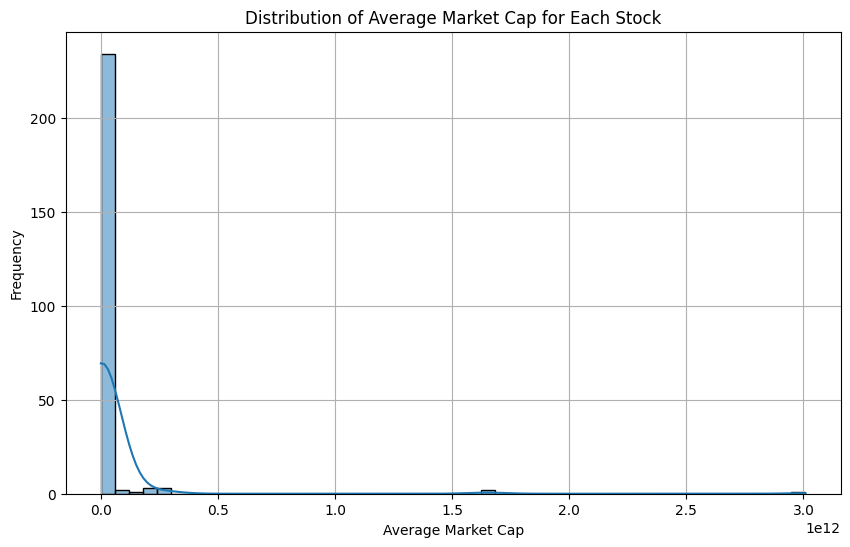

In [6]:
# Calculate the average market cap for each stock (identified by the 'ticker')
average_market_caps = df.groupby('ticker')['stock_market_cap'].mean()


plt.figure(figsize=(10, 6))
sns.histplot(average_market_caps, bins=50, kde=True)
plt.title('Distribution of Average Market Cap for Each Stock')
plt.xlabel('Average Market Cap')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

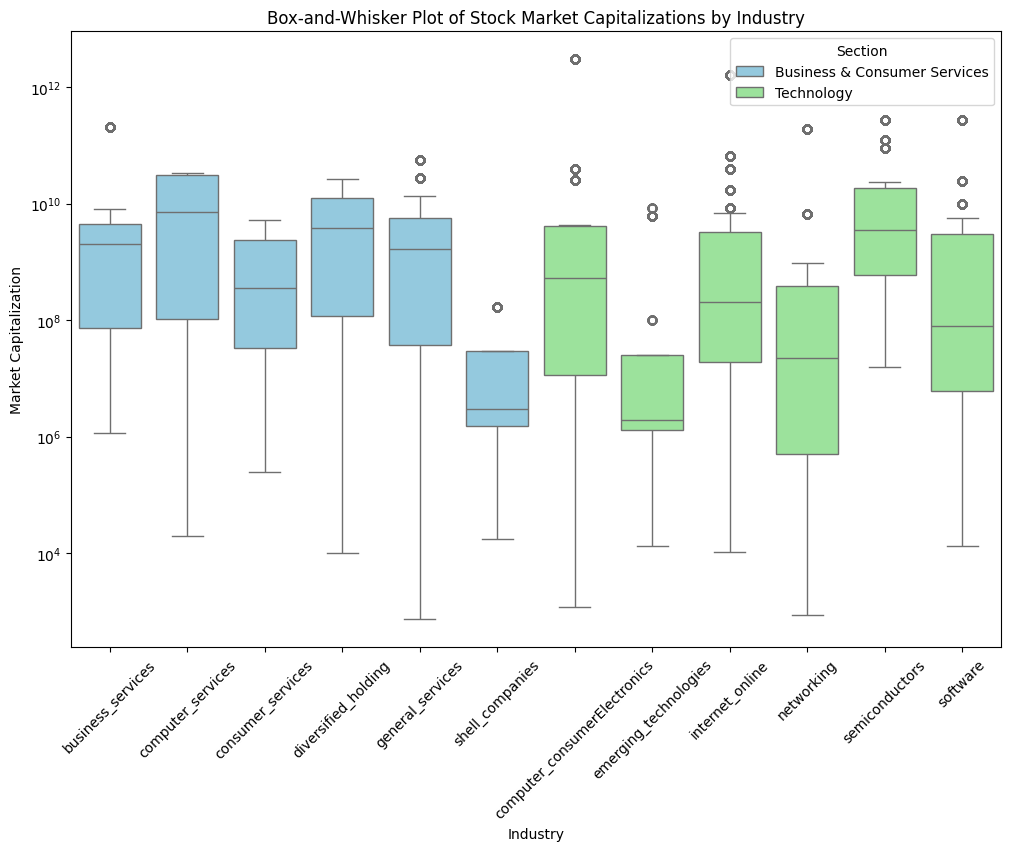

In [7]:



business_consumer_services = ['business_services', 'computer_services', 'consumer_services', 'diversified_holding', 'general_services', 'shell_companies']
technology = ['computer_consumerElectronics', 'emerging_technologies', 'internet_online', 'networking', 'semiconductors', 'software']


df['section'] = df['industry'].apply(lambda x: 'Business & Consumer Services' if x in business_consumer_services else 'Technology')

palette = {'Business & Consumer Services': 'skyblue', 'Technology': 'lightgreen'}


plt.figure(figsize=(12, 8))
sns.boxplot(x='industry', y='stock_market_cap', hue='section', data=df, palette=palette, dodge=False)
plt.title('Box-and-Whisker Plot of Stock Market Capitalizations by Industry')
plt.ylabel('Market Capitalization')
plt.xlabel('Industry')
plt.xticks(rotation=45)
plt.yscale('log')
plt.legend(title='Section')
plt.show()


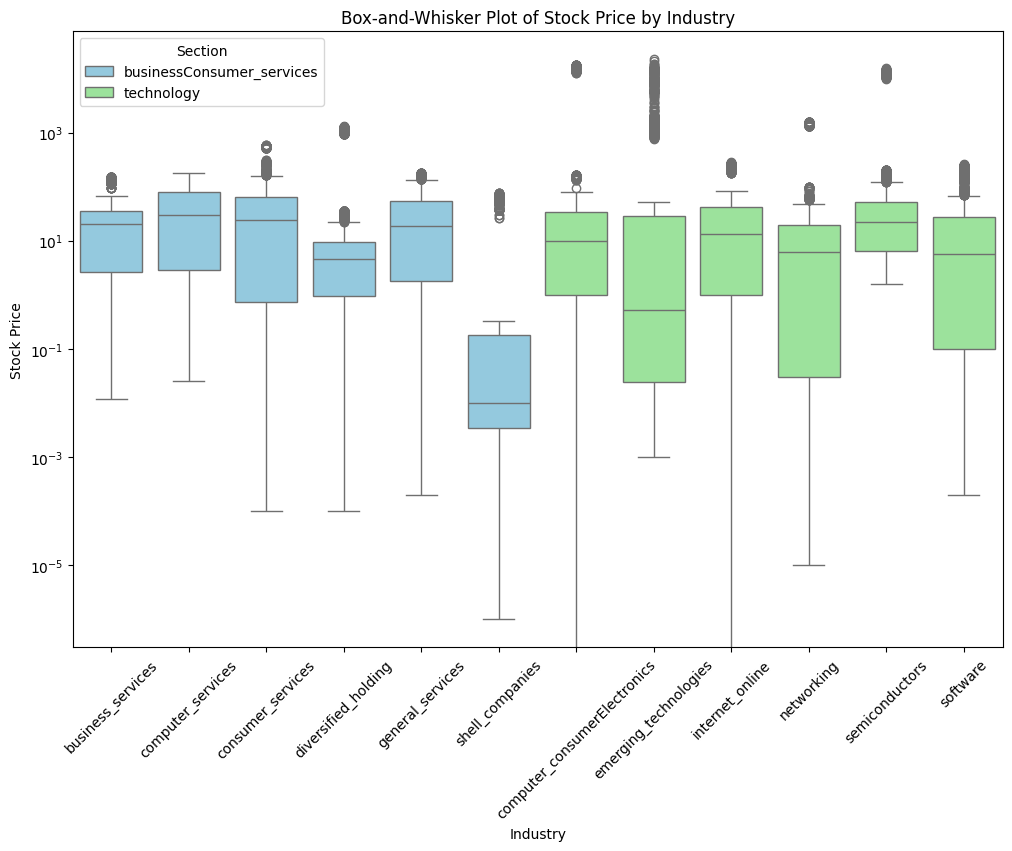

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Your file path setup
path = 'C:/Users/Janet/OneDrive - The University of Chicago/Data_policy/final-project-janet'
file_name = 'combined_stock_data.csv'
file_path = os.path.join(path, file_name)
df = pd.read_csv(file_path)

# Correcting the palette dictionary
palette = {'businessConsumer_services': 'skyblue', 'technology': 'lightgreen'}

# Creating the box-and-whisker plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='industry', y='stock_adj_close', hue='sector', data=df, palette=palette, dodge=False)
plt.title('Box-and-Whisker Plot of Stock Price by Industry')
plt.ylabel('Stock Price')
plt.xlabel('Industry')
plt.xticks(rotation=45)
plt.yscale('log')  # Using logarithmic scale for better visualization
plt.legend(title='Section')
plt.show()

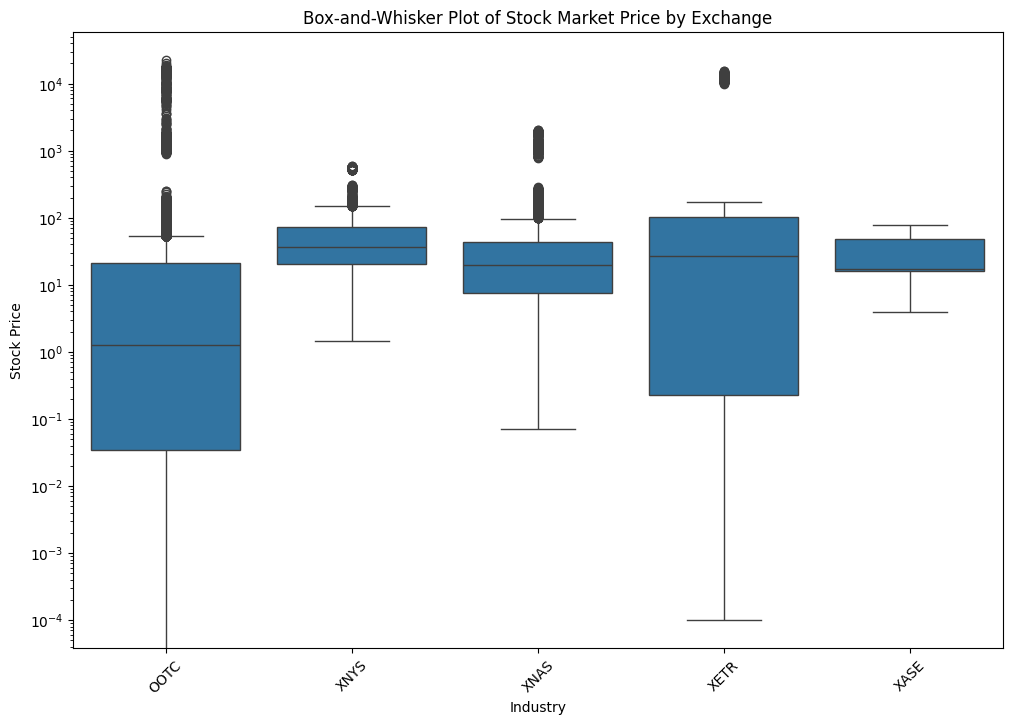

In [9]:
market_caps = df['stock_adj_close']
industries = df['exchange']


plt.figure(figsize=(12, 8))
sns.boxplot(x=industries, y=market_caps)
plt.title('Box-and-Whisker Plot of Stock Market Price by Exchange')
plt.ylabel('Stock Price')
plt.xlabel('Industry')
plt.xticks(rotation=45)  
plt.yscale('log')  
plt.show()

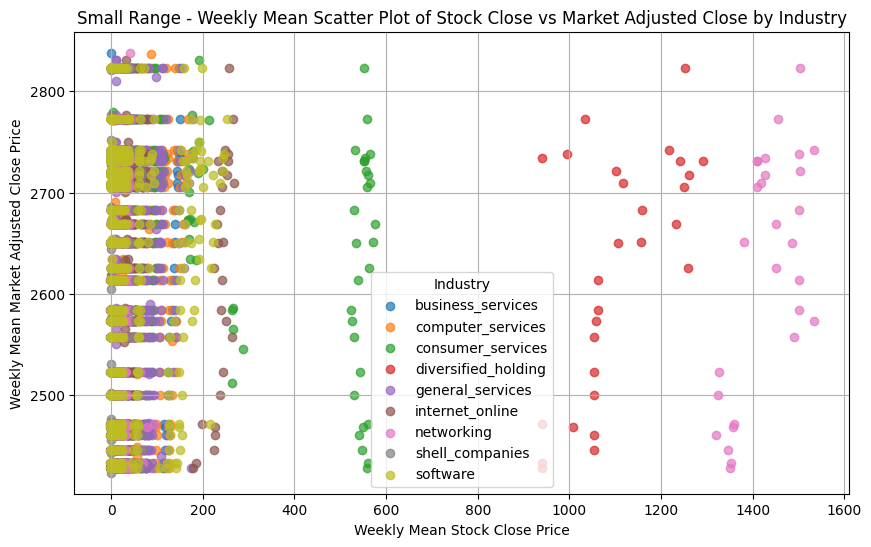

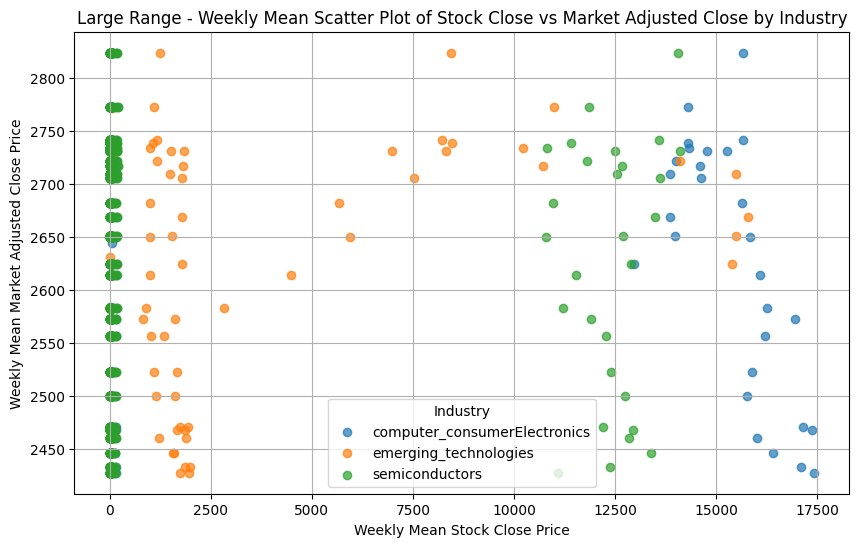

In [10]:
path = 'C:/Users/Janet/OneDrive - The University of Chicago/Data_policy/final-project-janet'
file_name = 'combined_stock_data.csv'
file_path = os.path.join(path, file_name)
df = pd.read_csv(file_path)



df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

df['stock_adj_close'] = pd.to_numeric(df['stock_adj_close'], errors='coerce')
df['market_adj_close'] = pd.to_numeric(df['market_adj_close'], errors='coerce')

agg_df = df.groupby(['ticker', 'industry']).resample('2W')[['stock_adj_close', 'market_adj_close']].mean().reset_index()

industry_ranges = agg_df.groupby('industry')['stock_adj_close'].apply(lambda x: x.max() - x.min()).to_dict()

range_threshold = agg_df['stock_adj_close'].max() - agg_df['stock_adj_close'].min()
small_range_industries = [industry for industry, range_val in industry_ranges.items() if range_val < range_threshold / 2]
large_range_industries = [industry for industry, range_val in industry_ranges.items() if range_val >= range_threshold / 2]

plt.figure(figsize=(10, 6))
for industry in small_range_industries:
    subset = agg_df[agg_df['industry'] == industry]
    plt.scatter(subset['stock_adj_close'], subset['market_adj_close'], label=industry, alpha=0.7)
plt.title('Small Range - Weekly Mean Scatter Plot of Stock Close vs Market Adjusted Close by Industry')
plt.xlabel('Weekly Mean Stock Close Price')
plt.ylabel('Weekly Mean Market Adjusted Close Price')
plt.legend(title='Industry')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
for industry in large_range_industries:
    subset = agg_df[agg_df['industry'] == industry]
    plt.scatter(subset['stock_adj_close'], subset['market_adj_close'], label=industry, alpha=0.7)
plt.title('Large Range - Weekly Mean Scatter Plot of Stock Close vs Market Adjusted Close by Industry')
plt.xlabel('Weekly Mean Stock Close Price')
plt.ylabel('Weekly Mean Market Adjusted Close Price')
plt.legend(title='Industry')
plt.grid(True)
plt.show()


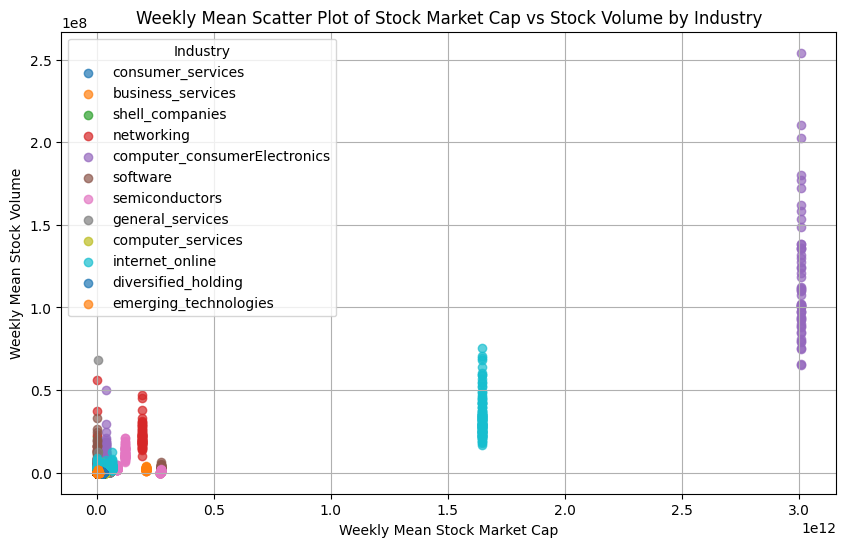

In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define file path
path = 'C:/Users/Janet/OneDrive - The University of Chicago/Data_policy/final-project-janet'
file_name = 'combined_stock_data.csv'
file_path = os.path.join(path, file_name)

# Read CSV file into DataFrame
df = pd.read_csv(file_path)

# Convert 'date' column to datetime and set it as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Convert 'stock_market_cap' and 'stock_volume' to numeric
df['stock_market_cap'] = pd.to_numeric(df['stock_market_cap'], errors='coerce')
df['stock_volume'] = pd.to_numeric(df['stock_volume'], errors='coerce')

# Group by 'ticker' and 'industry', resample to weekly, and calculate mean for specified columns
agg_df = df.groupby(['ticker', 'industry']).resample('W')[['stock_market_cap', 'stock_volume']].mean().reset_index()

# Create a scatter plot for all industries
plt.figure(figsize=(10, 6))
for industry in agg_df['industry'].unique():
    subset = agg_df[agg_df['industry'] == industry]
    plt.scatter(subset['stock_market_cap'], subset['stock_volume'], label=industry, alpha=0.7)

# Customize plot
plt.title('Weekly Mean Scatter Plot of Stock Market Cap vs Stock Volume by Industry')
plt.xlabel('Weekly Mean Stock Market Cap')
plt.ylabel('Weekly Mean Stock Volume')
plt.legend(title='Industry')
plt.grid(True)
plt.show()


In [12]:
filtered_df = df[df['industry'] == 'consumer_services']


range_stock_adj_price = filtered_df['stock_adj_close'].max() - filtered_df['stock_adj_close'].min()


print(range_stock_adj_price)

filtered_df = df[df['industry'] == 'computer_services']

range_stock_adj_price = filtered_df['stock_adj_close'].max() - filtered_df['stock_adj_close'].min()


print(range_stock_adj_price)

filtered_df = df[df['industry'] == 'consumer_services']

range_stock_adj_price = filtered_df['stock_adj_close'].max() - filtered_df['stock_adj_close'].min()


print(range_stock_adj_price)


587.5979834960963
177.62399389594793
587.5979834960963


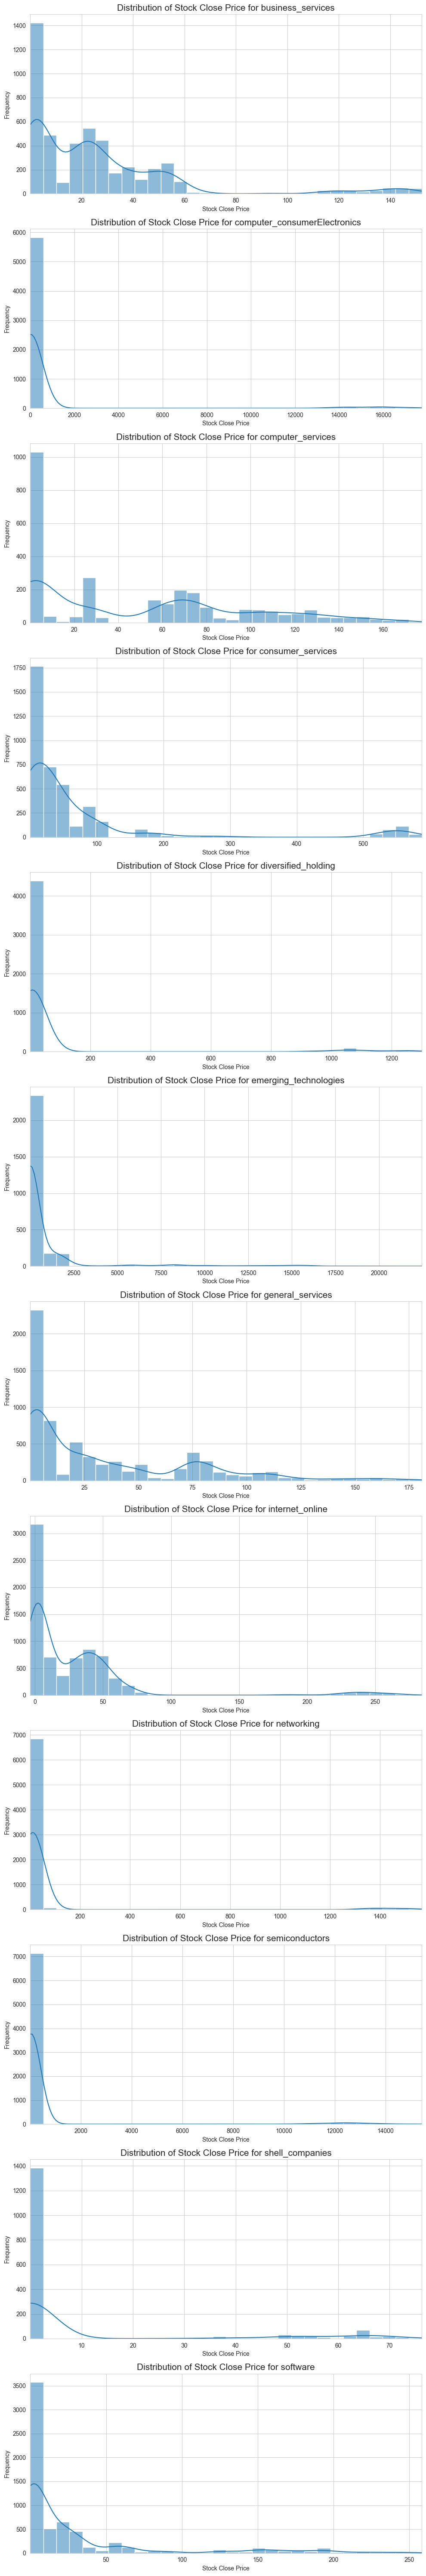

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style('whitegrid')


df = df.dropna(subset=['industry'])


num_industries = df['industry'].nunique()

num_rows = num_industries


fig, axes = plt.subplots(num_rows, 1, figsize=(10, 5*num_rows), sharex=False)


axes = axes if num_industries > 1 else [axes]


for i, industry in enumerate(sorted(df['industry'].unique(), key=lambda v: (isinstance(v, str), v))):
    subset = df[df['industry'] == industry]
    sns.histplot(subset['stock_adj_close'], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of Stock Close Price for {industry}', fontsize=15)
    axes[i].set_xlabel('Stock Close Price')
    axes[i].set_ylabel('Frequency')

    axes[i].set_xlim(left=subset['stock_adj_close'].min(), right=subset['stock_adj_close'].max())


plt.tight_layout()
plt.show()


In [14]:
def box_plot():
    business_consumer_services = ['business_services', 'computer_services', 'consumer_services', 'diversified_holding', 'general_services', 'shell_companies']
    technology = ['computer_consumerElectronics', 'emerging_technologies', 'internet_online', 'networking', 'semiconductors', 'software']


    df['section'] = df['industry'].apply(lambda x: 'Business & Consumer Services' if x in business_consumer_services else 'Technology')

    palette = {'Business & Consumer Services': 'skyblue', 'Technology': 'lightgreen'}


    plt.figure(figsize=(12, 8))
    sns.boxplot(x='industry', y='stock_market_cap', hue='section', data=df, palette=palette, dodge=False)
    plt.title('Box-and-Whisker Plot of Stock Market Capitalizations by Industry')
    plt.ylabel('Market Capitalization')
    plt.xlabel('Industry')
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.legend(title='Section')
    plt.show()

C:\Users\Janet\AppData\Local\Temp\ipykernel_6160\1814465285.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x_axis, y=y_axis, hue=hue, data=df, palette=palette, dodge=False)


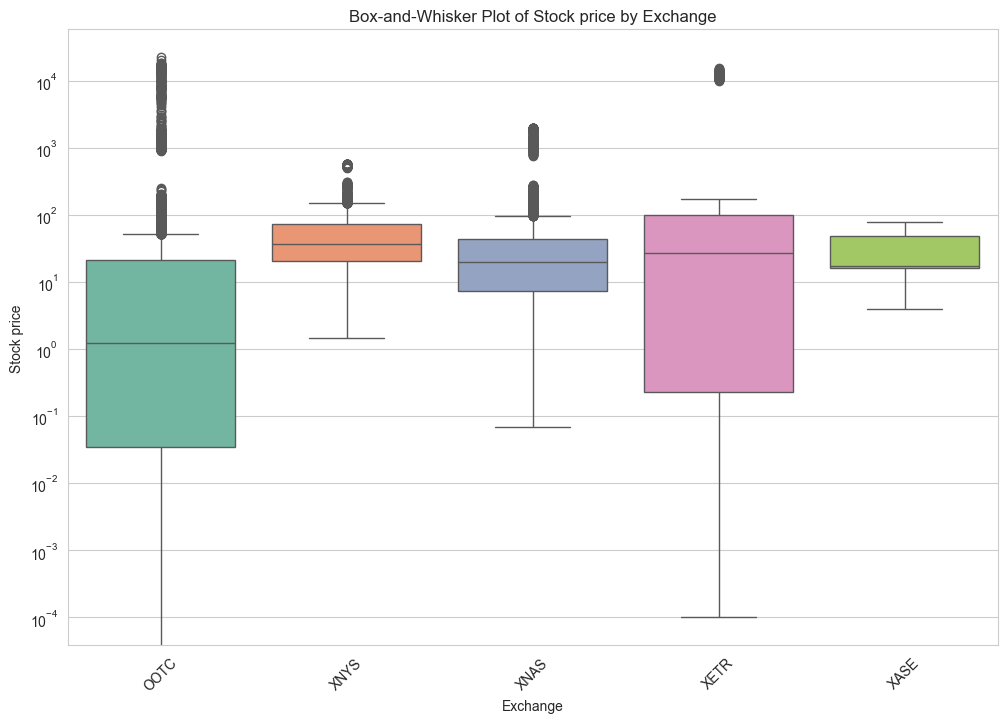

In [15]:
def create_boxplot(df, x_axis_input, y_axis_input, log_scale='auto'):
    """
    Creates a box-and-whisker plot with dynamic x-axis, y-axis, and automatic y-axis scaling.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    x_axis_input (str): User-friendly name for the x-axis.
    y_axis_input (str): User-friendly name for the y-axis.
    log_scale (bool or 'auto', optional): Whether to use logarithmic scale for the y-axis. 
                                          Set to 'auto' for automatic scaling. Defaults to 'auto'.
    """

    # Mapping of user-friendly input values to DataFrame column names
    input_to_column = {
        'Stock Price': 'stock_adj_close',
        'Market Capitalization': 'stock_market_cap',
        'Volume': 'stock_volume',
        'Industry': 'industry',
        'Exchange': 'exchange'
    }

    # Translate inputs to actual DataFrame column names
    x_axis = input_to_column.get(x_axis_input, x_axis_input)
    y_axis = input_to_column.get(y_axis_input, y_axis_input)
    hue = 'sector' if x_axis_input == 'Industry' else None

    # Set up color palettes
    if x_axis == 'industry':
        palette = sns.color_palette("pastel", len(df[hue].unique()))
        palette = dict(zip(df[hue].unique(), palette))
    elif x_axis == 'exchange':
        palette = sns.color_palette("Set2", len(df[x_axis].unique()))
        palette = dict(zip(df[x_axis].unique(), palette))
    else:
        palette = None

    # Creating the box-and-whisker plot
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=x_axis, y=y_axis, hue=hue, data=df, palette=palette, dodge=False)
    plt.title(f'Box-and-Whisker Plot of {y_axis_input.capitalize()} by {x_axis_input.capitalize()}')
    plt.ylabel(y_axis_input.capitalize())
    plt.xlabel(x_axis_input.capitalize())
    plt.xticks(rotation=45)
    
    # Automatically determine y-axis scale
    if log_scale == 'auto':
        data_range = df[y_axis].max() - df[y_axis].min()
        if data_range > 0 and (np.log10(data_range) > 3 or np.log10(df[y_axis].max()) > 3):
            plt.yscale('log')
    elif log_scale:
        plt.yscale('log')

    if hue:
        plt.legend(title=hue.capitalize())
    
    plt.show()
# df_remove = df[df['stock_adj_close']>0]
create_boxplot(df, 'Exchange', 'Stock Price', log_scale='auto')



C:\Users\Janet\AppData\Local\Temp\ipykernel_6160\3264476134.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.get_text().replace('_', ' ').title() for label in ax.get_xticklabels()])


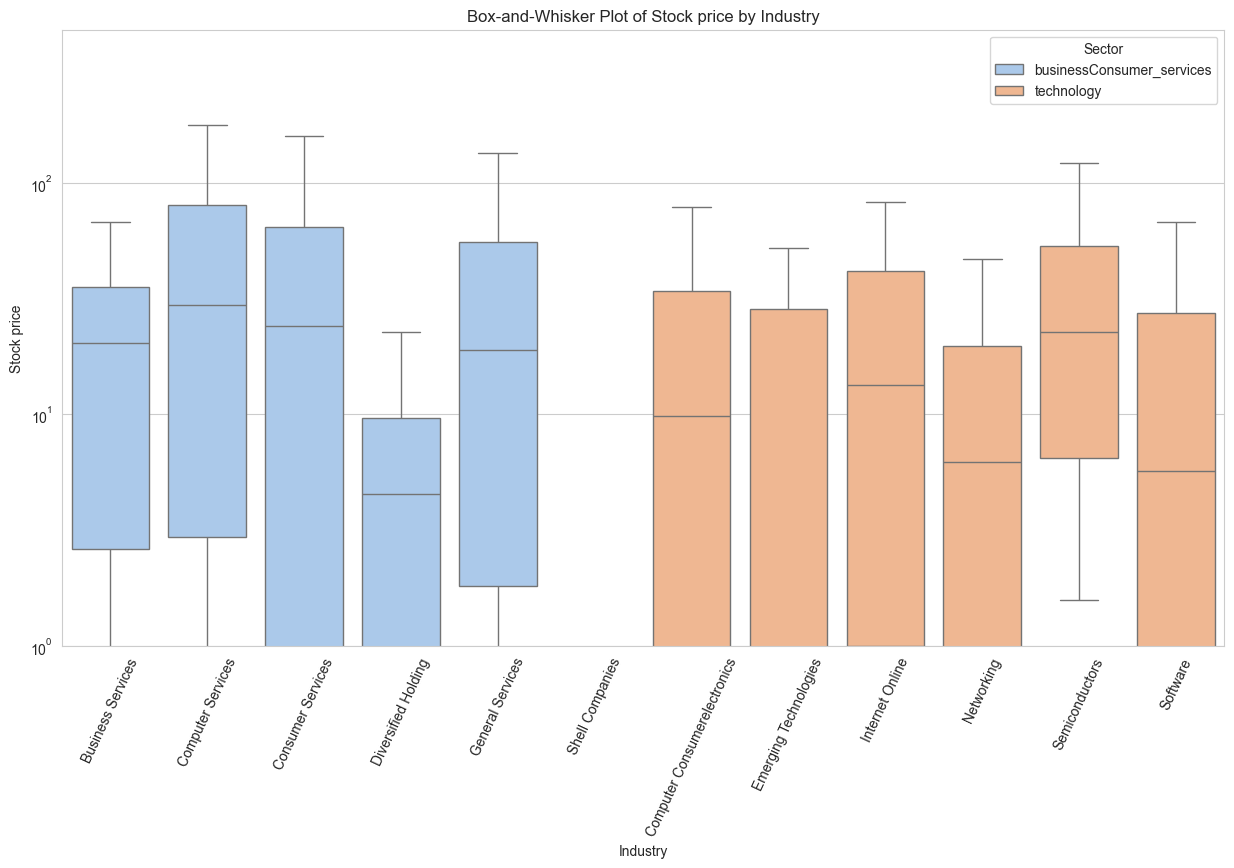

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def create_boxplot(df, x_axis_input, y_axis_input, log_scale='auto'):

    # Mapping of user-friendly input values to DataFrame column names
    input_to_column = {
        'Stock Price': 'stock_adj_close',
        'Market Capitalization': 'stock_market_cap',
        'Volume': 'stock_volume',
        'Industry': 'industry',
        'Exchange': 'exchange'
    }

    # Translate inputs to actual DataFrame column names
    x_axis = input_to_column.get(x_axis_input, x_axis_input)
    y_axis = input_to_column.get(y_axis_input, y_axis_input)
    hue = 'sector' if x_axis_input == 'Industry' else None


    palette_column = hue if x_axis_input == 'Industry' else x_axis
    # Generate a palette based on the number of unique values in the selected column
    palette = sns.color_palette("pastel", len(df[palette_column].unique()))
    palette = dict(zip(df[palette_column].unique(), palette))

    
    plt.figure(figsize=(15, 8))
    ax = sns.boxplot(x=x_axis, y=y_axis, hue=hue, data=df, palette=palette, dodge=False,showfliers=False)
    if x_axis_input == 'Industry': # Format the x-axis labels to be more readable
        ax.set_xticklabels([label.get_text().replace('_', ' ').title() for label in ax.get_xticklabels()])
    
    plt.title(f'Box-and-Whisker Plot of {y_axis_input.capitalize()} by {x_axis_input.capitalize()}')
    plt.ylabel(y_axis_input.capitalize())
    plt.xlabel(x_axis_input.capitalize())
    ax.xaxis.grid(False) # Turn off the display of the horizontal gridlines
    ax.yaxis.grid(True)
    plt.xticks(rotation=65)
    
    # Automatically determine y-axis scale
    if log_scale == 'auto':
        if df[y_axis].min() > 0:  # Check if there are no zero or negative values
            data_range = np.log10(df[y_axis].max()) - np.log10(df[y_axis].min())
            if data_range > 3:  # Use a log scale if data range is large
                ax.set_yscale('log')
        else:
            # Add a small constant to zero values if present to use log scale
            df[y_axis] += df[y_axis].eq(0)
            ax.set_yscale('log')
            ax.set_ylim(bottom=1)  # Set the bottom of the y-axis to 1 to avoid negative values
    elif log_scale:
        ax.set_yscale('log')

    if df[y_axis].max() < 10000:
        ax.ticklabel_format(style='plain', axis='y')
        
    if hue:
        plt.legend(title=hue.capitalize())
    
    plt.show()

create_boxplot(df, 'Industry', 'Stock Price', log_scale='auto')


C:\Users\Janet\AppData\Local\Temp\ipykernel_6160\547871702.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.get_text().replace('_', ' ').title() for label in ax.get_xticklabels()])


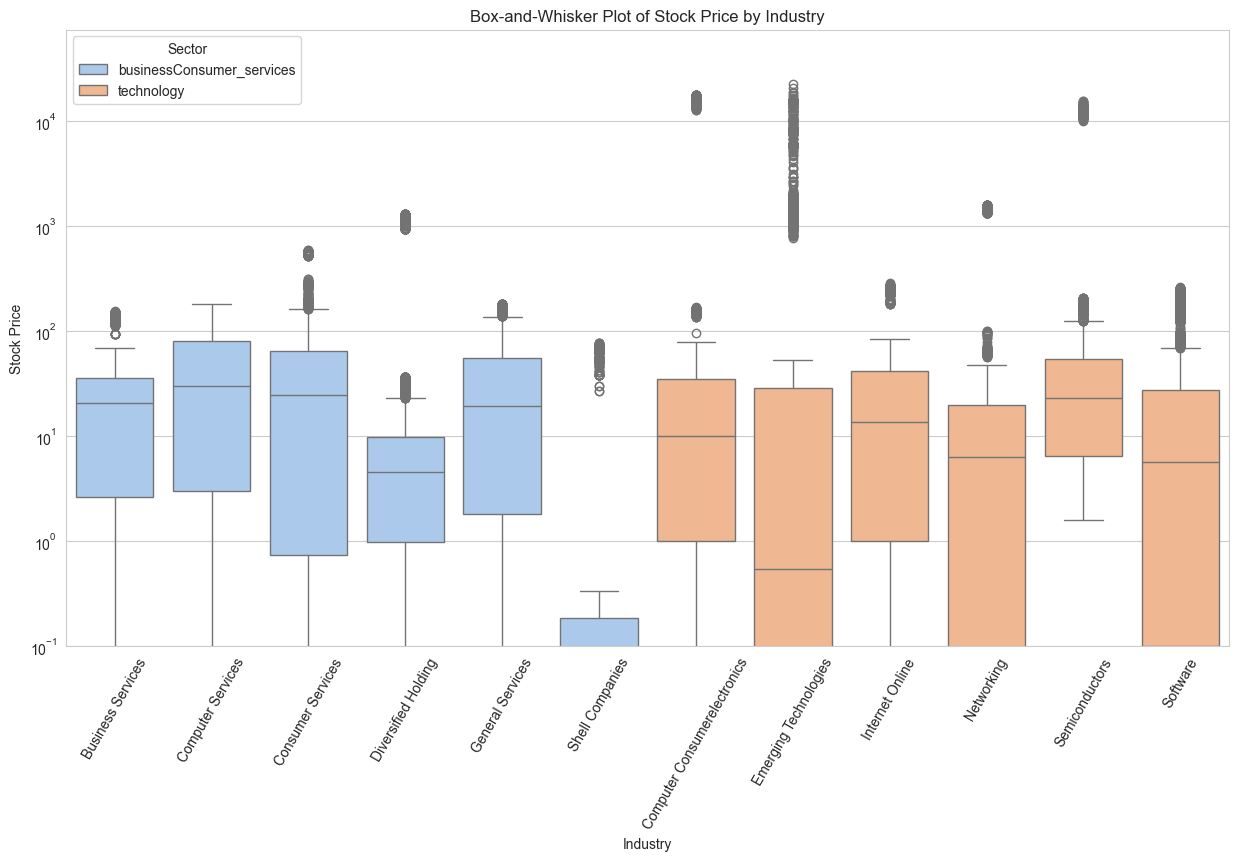

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def create_boxplot(df, x_axis_input, y_axis_input, log_scale='auto'):
    # Mapping of user-friendly input values to DataFrame column names
    input_to_column = {
        'Stock Price': 'stock_adj_close',
        'Market Capitalization': 'stock_market_cap',
        'Volume': 'stock_volume',
        'Industry': 'industry',
        'Exchange': 'exchange'
    }

    # Translate inputs to actual DataFrame column names
    x_axis = input_to_column.get(x_axis_input, x_axis_input)
    y_axis = input_to_column.get(y_axis_input, y_axis_input)
    hue = 'sector' if x_axis_input == 'Industry' else None

    # Determine the column for the palette and generate the palette
    palette_column = hue if x_axis_input == 'Industry' else x_axis
    palette = sns.color_palette("pastel", len(df[palette_column].unique()))
    palette = dict(zip(df[palette_column].unique(), palette))

    # Create the plot
    plt.figure(figsize=(15, 8))
    ax = sns.boxplot(x=x_axis, y=y_axis, hue=hue, data=df, palette=palette, dodge=False)
    
    # Format the x-axis labels to be more readable
    ax.set_xticklabels([label.get_text().replace('_', ' ').title() for label in ax.get_xticklabels()])

    # Set the title and labels with proper capitalization
    plt.title(f'Box-and-Whisker Plot of {y_axis_input.replace("_", " ").title()} by {x_axis_input.replace("_", " ").title()}')
    plt.ylabel(y_axis_input.replace("_", " ").title())
    plt.xlabel(x_axis_input.replace("_", " ").title())
    plt.xticks(rotation=60)
    
    # Automatically determine y-axis scale
    if log_scale == 'auto':
        if df[y_axis].min() > 0:  # Check for positive values
            data_range = np.log10(df[y_axis].max()) - np.log10(df[y_axis].min())
            if data_range > 3:  # Use a log scale if the range is large
                ax.set_yscale('log')
        else:
            # Add a small constant to zero values to use log scale
            df.loc[df[y_axis] == 0, y_axis] = 0.1  # Replace 0 with 0.1
            ax.set_yscale('log')
            ax.set_ylim(bottom=0.1)  # Set the bottom of the y-axis to avoid negative values
    elif log_scale:
        ax.set_yscale('log')
    
    # if df[y_axis].max() < 10000:
    #     ax.ticklabel_format(style='plain', axis='y')

    if hue:
        plt.legend(title=hue.capitalize())

    plt.show()

# Usage example
create_boxplot(df, 'Industry', 'Stock Price', log_scale='auto')
